In [23]:
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show



In [24]:
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
        


In [61]:
import FixedPoint
import math
import numpy as np

pi = math.pi
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)
        
family = FixedPoint.FXfamily(1)     
bit32xValues = np.array([])
for val in x:  
    val = float(val)
    F32x = FixedPoint.FXnum(val, family)
    bit32xValues = np.append(bit32xValues,F32x)
print bit32xValues[1]

#I16Q16 format
family = FixedPoint.FXfamily(16)     
bit16xValues = np.array([])
for val in x:  
    val = float(val)
    F16x = FixedPoint.FXnum(val, family)
    bit16xValues = np.append(bit16xValues,F16x)
print bit16xValues[1]

1
1.38189


In [62]:
#32 bit integer 31 data bits and one signed bit
x32= bit32xValues
#32 bit with I16Q16 format
x16 = bit16xValues

In [72]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)
filtered_x32 = lfilter(taps, 1.0, x32)
filtered_x16 = lfilter(taps, 1.0, x16)


[ -1.58405013e-04  -2.90811822e-04  -1.69777617e-04   3.73634468e-04
   1.28292071e-03   2.21598827e-03   2.61368587e-03   1.92263396e-03
  -4.50468189e-05  -2.80243176e-03  -5.20347304e-03  -5.87320857e-03
  -3.85600208e-03   8.12846288e-04   6.83117616e-03   1.18176968e-02
   1.30778923e-02   8.81574532e-03  -7.06979478e-04  -1.26963378e-02
  -2.24153609e-02  -2.47868428e-02  -1.65761755e-02   1.60778671e-03
   2.44561383e-02   4.29981258e-02   4.75490797e-02   3.16950796e-02
  -4.08205718e-03  -5.05287955e-02  -9.04651683e-02  -1.02554290e-01
  -6.71446375e-02   2.76101016e-02   1.81419688e-01   3.80809267e-01
   6.01790210e-01   8.15567238e-01   9.95649818e-01   1.12419752e+00
   1.19563986e+00   1.21661221e+00   1.20254944e+00   1.17226871e+00
   1.14231727e+00   1.12280609e+00   1.11588808e+00   1.11702453e+00
   1.11813354e+00   1.11119415e+00   1.09104742e+00   1.05667195e+00
   1.01079957e+00   9.58294813e-01   9.04137167e-01   8.51866870e-01
   8.02944572e-01   7.56980347e-01

In [64]:
#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)


In [65]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

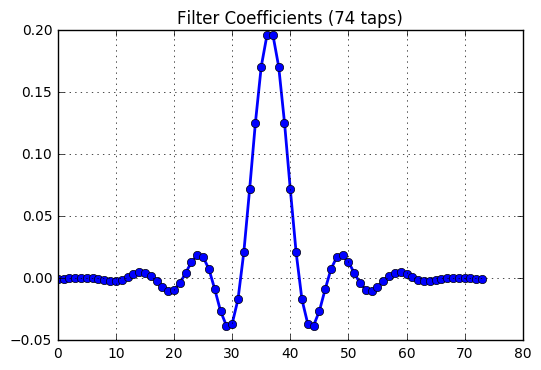

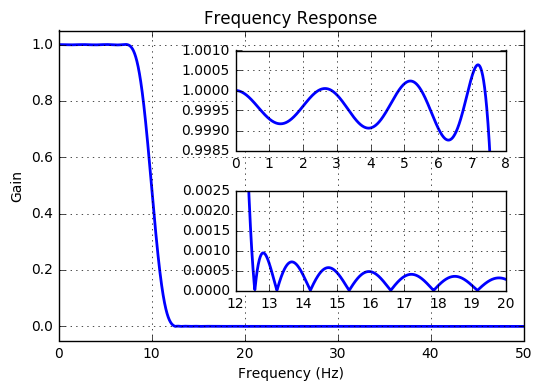

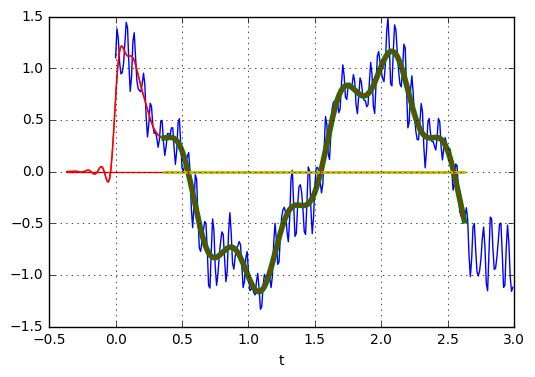

In [66]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
plot(t-delay, filtered_x32, 'r-')
plot(t-delay, filtered_x16, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)
plot(t[N-1:]-delay, filtered_x32[N-1:], 'y', linewidth=2)
plot(t[N-1:]-delay, filtered_x16[N-1:], 'r', linewidth=1)

xlabel('t')
grid(True)

show()


In [67]:
#Comparison of the errors with the two methods 32 bits and normal

import matplotlib.pyplot as plt
import itertools
diff= np.array([])
for val1,val2 in itertools.izip(x,x32):
    differenceInResult = val1-val2
    differenceInResult = FixedPoint.FXnum(differenceInResult, FixedPoint.FXfamily(64))
    floatvar = float(differenceInResult)
    diff = np.append(diff, floatvar)



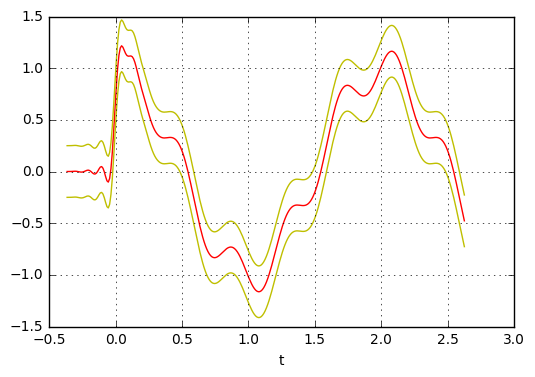

Max value of Error with 32 bit fixed point :  0.25
Min value of Error with 32 bit fixed point :  0.25


In [68]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
#plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
#plot(t-delay, filtered_x32, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
#plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)
#plot(t[N-1:]-delay, filtered_x32[N-1:], 'y', linewidth=1)
maxerror = filtered_x + diff
minerror = filtered_x - diff
plot(t-delay, maxerror, 'y-')
plot(t-delay, minerror, 'y-')
xlabel('t')
grid(True)

show()

print "Max value of Error with 32 bit fixed point : ", max(diff)
print "Min value of Error with 32 bit fixed point : ", min(diff)


In [69]:
#Comparison of the errors with the two methods 16 bits and normal

import matplotlib.pyplot as plt
import itertools
diff1= np.array([])
for val1,val2 in itertools.izip(x,x16):
    differenceInResult = val1-val2
    differenceInResult = FixedPoint.FXnum(differenceInResult, FixedPoint.FXfamily(32))
    floatvar = float(differenceInResult)
    diff1 = np.append(diff1, floatvar)


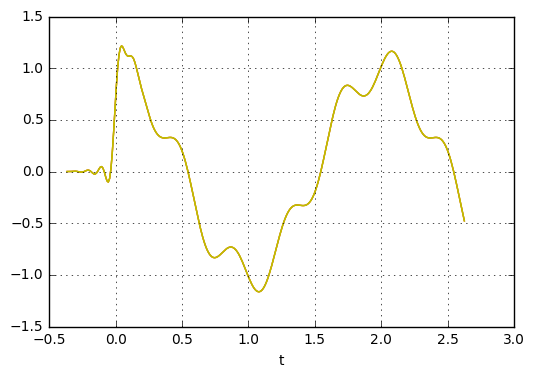

Max value of Error with I16Q16 fixed point :  7.62916170061e-06
Min value of Error with I16Q16 fixed point :  7.62916170061e-06


In [71]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
#plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x, 'r-')
#plot(t-delay, filtered_x32, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
#plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)
#plot(t[N-1:]-delay, filtered_x32[N-1:], 'y', linewidth=1)
maxerror = filtered_x + diff1
minerror = filtered_x - diff1
plot(t-delay, maxerror, 'y-')
plot(t-delay, minerror, 'y-')
xlabel('t')
grid(True)

show()

print "Max value of Error with I16Q16 fixed point : ", max(diff1)
print "Min value of Error with I16Q16 fixed point : ", min(diff1)

In [60]:
# floating point data representation of x

xtest = 1.381911656


ImportError: No module named bigfloat